# EDA for E-commerce Shipping

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("shipping_ecommerce.csv")

In [3]:
df.describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Class
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000
mean,4.054555,2.990453,3.567558,13.373704,3633.873522,0.596745
std,1.141497,1.413635,1.522924,16.206183,1635.382636,0.490573
min,2.000000,1.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,1839.250000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,5049.750000,1.000000
max,7.000000,5.000000,10.000000,65.000000,7846.000000,1.000000


In [4]:
df.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1


## Lets look at how the data is distributed

<AxesSubplot:>

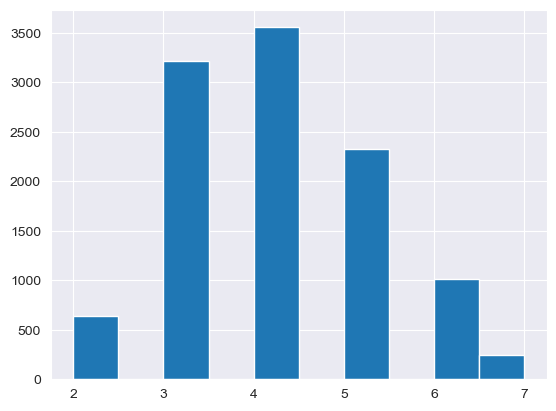

In [5]:
df.Customer_care_calls.hist()

<AxesSubplot:>

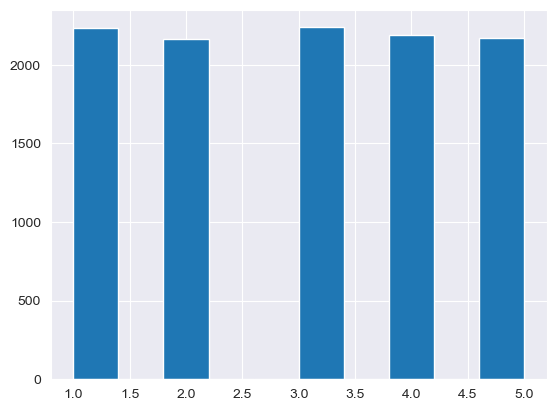

In [6]:
df.Customer_rating.hist()

<AxesSubplot:>

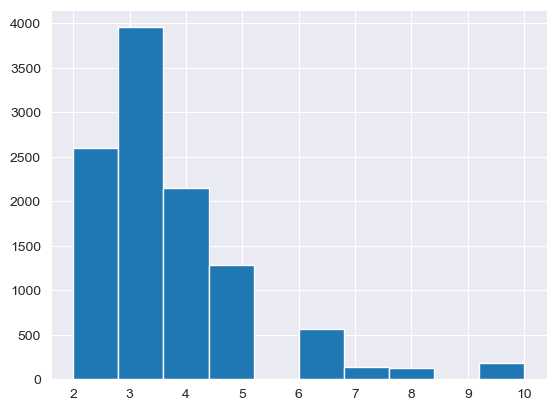

In [7]:
df.Prior_purchases.hist()

<AxesSubplot:>

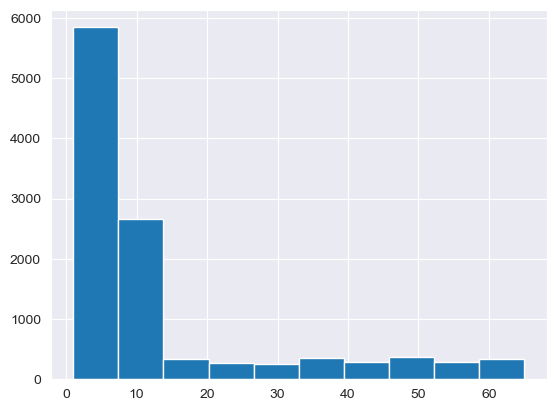

In [8]:
df.Discount_offered.hist()

<AxesSubplot:>

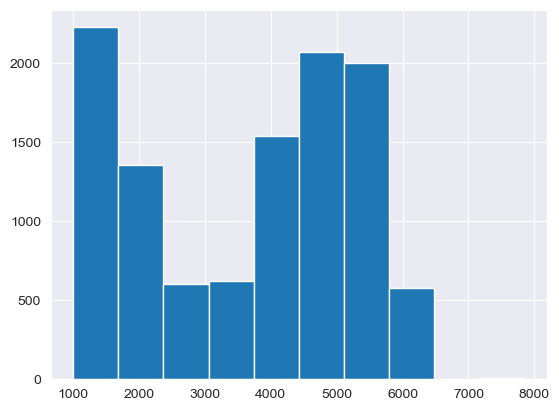

In [9]:
df.Weight_in_gms.hist()

<AxesSubplot:>

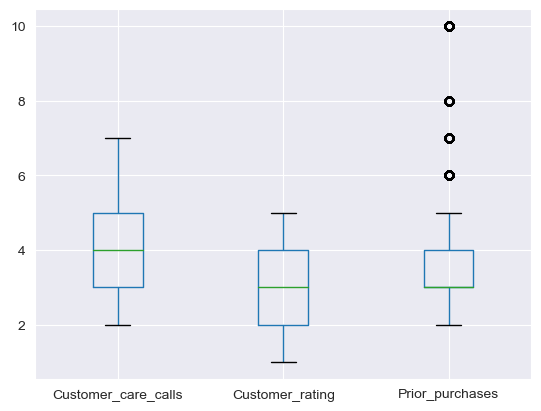

In [10]:
df.boxplot(column = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases'])

<AxesSubplot:>

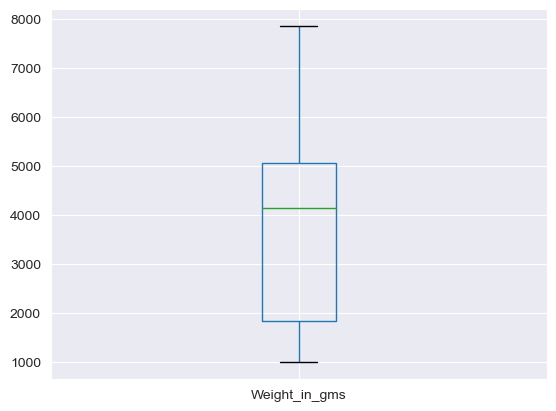

In [11]:
df.boxplot(column = ['Weight_in_gms'])

## Lets take a look at the correlation between the features

In [12]:
df[['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Class']].corr()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Class
Customer_care_calls,1.000000,0.012270,0.180803,-0.130784,-0.276557,-0.067235
Customer_rating,0.012270,1.000000,0.013161,-0.003103,-0.001960,0.013199
Prior_purchases,0.180803,0.013161,1.000000,-0.082761,-0.168246,-0.055488
Discount_offered,-0.130784,-0.003103,-0.082761,1.000000,-0.376055,0.397100
Weight_in_gms,-0.276557,-0.001960,-0.168246,-0.376055,1.000000,-0.268715
Class,-0.067235,0.013199,-0.055488,0.397100,-0.268715,1.000000


<AxesSubplot:>

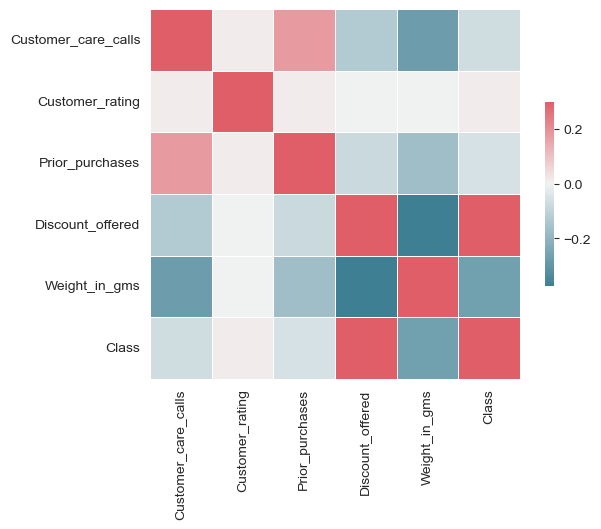

In [13]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Class']].corr(), cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5})

In [14]:
df_cat = df[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']]

<AxesSubplot:>

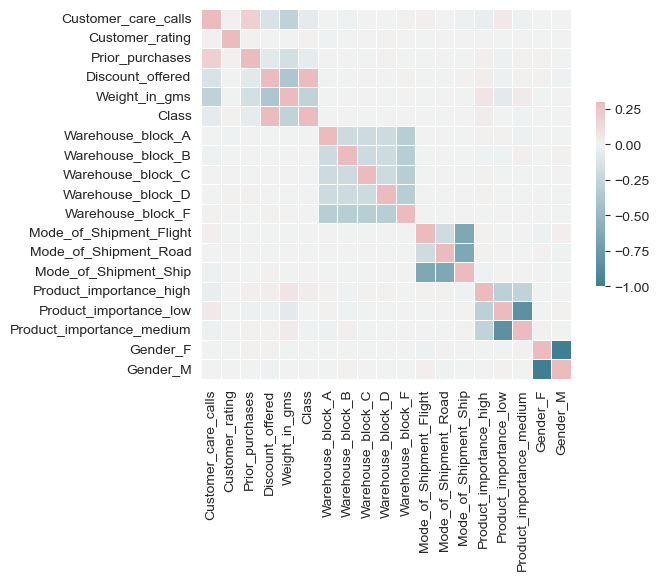

In [22]:
df_cat_dum = pd.get_dummies(df_cat)
df_n = pd.get_dummies(df)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_n.corr(), cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5})

## Lets take a look at how the features relate to each other

In [16]:
import matplotlib.pyplot as plt

graph for Warehouse_block: total = 5


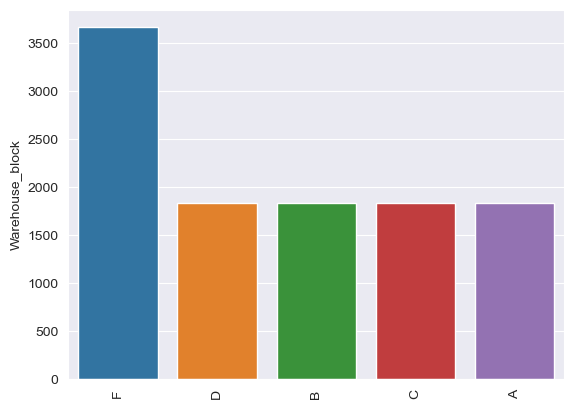

graph for Mode_of_Shipment: total = 3


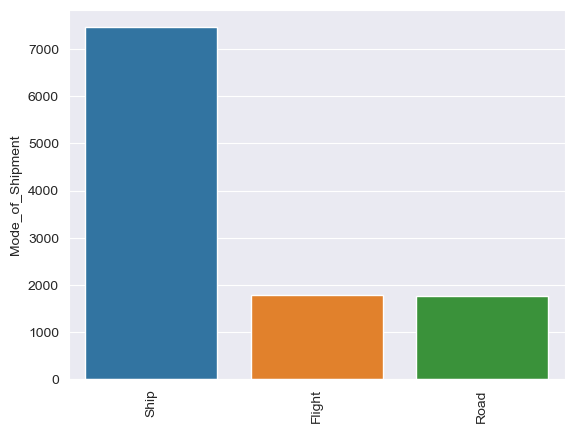

graph for Product_importance: total = 3


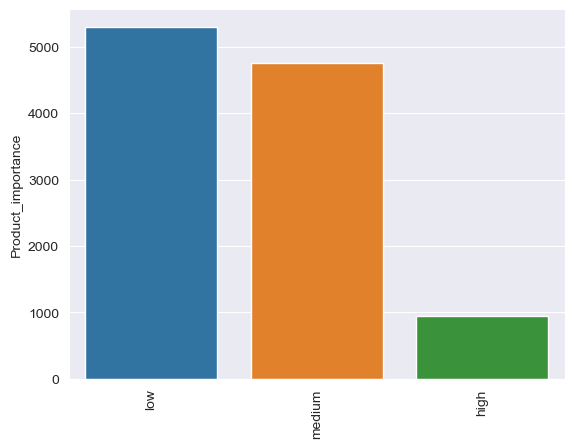

graph for Gender: total = 2


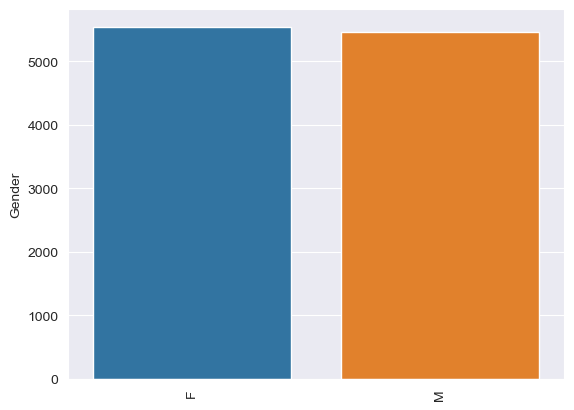

In [17]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


## Lets take a closer look at delivered shipments

In [18]:
pd.pivot_table(df, index = 'Customer_rating', values = 'Class')

,Class
Customer_rating,
1,0.587472
2,0.587991
3,0.606074
4,0.595521
5,0.606633


In [19]:
pd.pivot_table(df, index = ['Customer_rating','Prior_purchases'], values = 'Class')

Class
Customer_rating Prior_purchases          
1               2                0.628774
                3                0.623226
                4                0.541284
                5                0.483636
                6                0.567308
                7                0.653846
                8                0.416667
                10               0.656250
2               2                0.598058
                3                0.654867
                4                0.522959
                5                0.471698
                6                0.577586
                7                0.656250
                8                0.600000
                10               0.482759
3               2                0.652610
                3                0.652593
                4                0.540000
                5                0.509653
                6                0.522124
                7                0.750000
                8                0.615385
                10               0.531250
4               2                0.621154
                3                0.627700
                4                0.539906
                5                0.533898
                6                0.577236
                7                0.615385
                8                0.714286
                10               0.547619
5               2                0.626243
                3                0.644243
                4                0.571111
                5                0.500000
                6                0.552381
                7                0.700000
                8                0.880000
                10               0.627907

In [20]:
pd.pivot_table(df, index = ['Discount_offered'], values = 'Class')

,Class
Discount_offered,
1,0.481796
2,0.483683
3,0.477381
4,0.460606
5,0.466667
...,...
61,1.000000
62,1.000000
63,1.000000
